In [3]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

<h1 style="text-align: center;">Introdução à Adaptividade na Integração Numérica de EDOs</h1>

## 1. Adapta... quê?

Considere o Problema de Valor Inicial a seguir:

$$
    \begin{cases}
        y' = f(t,y) \\
        y(t_0) = y_0
    \end{cases}
$$

<p style="text-align: justify;">
Ao decidir resolver numericamente o PVI acima tem-se uma variedade enorme de métodos que podem ser mais ou menos adequados e encontrar soluções com erros maiores ou menores dependendo de características do método e específicas de cada problema que não podem ser expressas na representação genérica acima (ver exemplos abaixo).
</p>

<p style="text-align: justify;">
Diferentes métodos terão diferentes parâmetros ou tratamentos diferentes para os mesmos parâmetros, métodos explícitos da família Runge-Kutta não tem necessidade de malha equiespaçada, já alguns métodos simpléticos dependem disso para manter controlada a média da energia cinética do sistema.
</p>

<p style="text-align: justify;">
**Adaptatividade** é fazer com que esses parâmetros (tamanho dos intervalos da malha, onde na malha os intervalos são maiores ou menores, quantas iterações de correção se faz num Preditor-Corretor) passem a depender da função, isso pode ou não levar a soluções diferentes.
</p>

## 2. Intervalos entre os nós da malha

Dados os PVIs (1) e (2):

$$
(1):
\begin{cases}
    y' = 0 \\
    y(0) = 1
\end{cases}
\qquad\qquad
(2):
\begin{cases}
    y' = -2xe^{-x^2} \\
    y(0) = 1
\end{cases}
$$

Os gráficos abaixo mostram as soluções de (1) e (2). Os segmentos verticais mostram duas possíveis colocações dos nós na malha que deveria entrar esses resultados, as duas malhas tem a mesma quantidade de intervalos.

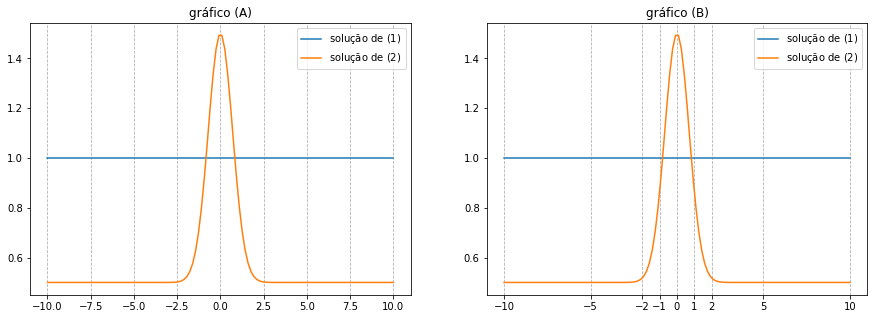

In [93]:
xs = np.linspace(-10,10,120)
ys = np.exp(-xs**2) + 0.5

plt.figure(1,figsize=(15,5))

plt.subplot(121)
plt.title('gráfico (A)')
plt.plot(xs,[1]*120,label='solução de $(1)$')
plt.plot(xs,ys,label='solução de $(2)$')
plt.grid(axis='x', linestyle='--')
plt.legend()

plt.subplot(122)
plt.title('gráfico (B)')
plt.plot(xs,[1]*120,label='solução de $(1)$')
plt.plot(xs,ys,label='solução de $(2)$')
plt.grid(axis='x', linestyle='--')
plt.xticks(np.round(np.append([0],[-np.logspace(0,1,4),np.logspace(0,1,4)]),0))
plt.legend()

plt.show()

<p style="text-align:justify;">
Nos gráficos acima, as linhas tracejadas representam os pontos escolhidos para compor a malha nesses problemas. O espaçamento da esquerda é uniforme enquanto o da direita tem mais pontos na região em que a função varia mais.
</p>

<p style="text-align: center; font-weight: bold;">Qual malha é mais adequada a cada solução e por quê?</p>

<p style="text-align: center; font-weight: bold;">O que acontece se a malha (A) for usada para resolver o PVI (1)? E se (A) resolver (2), (B) resolver (1) e (B) resolver (2)?</p>

## 3. Em Outros Parâmetros

<p style="text-align: justify;">
Mesmo que a adaptatividade gere uma malha mais adequada à função ela não precisa ser aplicada a ela de forma tão direta. Um bom exemplo é o Preditor-Corretor que pode (ou não) usar a divergência entre métodos de ordens diferentes (ou implícito e explícito) para gerar uma mudança na disposição dos nós.
</p>

### 3.1 Preditor-Corretor

<p style="text-align: justify;">
De acordo com [\[1\]](http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node7.html) a ideia de um Preditor-Corretor é combinar métodos implícitos e explícitos para obter melhores resultados em termos de convergência. O exemplo usado é o Euler-Trapézio em que o passo de correção é calculado usando o resultado obtido na predição.
</p>

<p style="text-align: justify;">
Preditores-Corretores costumam ter três possíveis etapas que podem ser empregadas de formas diferentes: Predição (__P__rediction), Correção (__C__orrection) e cálculo da função $f(t,y)$ (__E__valuation). Embora todos os métodos apliquem utilizem __PEC__, alguns podem precisar calcular a função mais uma vez se tornando __PECE__ ou rodar a correção mais vezes gerando __P$\text{(EC)}^k$__, __P$\text{(EC)}^k$E__, __PE$\text{(CE)}^k$__ onde $k$ é a quantidade de vezes que o corretor será rodado. Entretanto alguns métodos rodam o corretor até que haja convergência, são denominados __P$\text{(EC)}^\infty$__, __P$\text{(EC)}^\infty$E__ e __PE$\text{(CE)}^\infty$__, esses são métodos adaptativos pois a convergência vai depender da função em questão.
</p>

## 4. Perguntas

1. Se usar uma malha uniforme com intervalos de tamanho muito pequeno ou um método com ordem muito alta pode levar a um erro igualmente pequeno, por que usar adaptatividade?

2. No caso de um método que possa alterar os tamanhos dos intervalos, a malha resultante sempre será não-uniforme?

3. Adaptatividade está só na escolha do tamanho dos intervalos da malha?

4. O resultado sempre melhora ao mudar o método de modo a tornar algum(ns) parâmtero(s) adaptativo(s)?

## 5. Próximos Passos

<p style="text-align: justify;">
Tendo produzido um material bastante teórico, minha sugestão natural é: implemente. Escolha alguns problemas com características diferentes e verifique se tornar seus parâmetros adaptativos diminui o erro ou a quantidade de operações feitas para obter o mesmo erro. Procure também exemplos específicos de problemas em que adaptatividade não ajuda. Procure também métodos de resolução que não podem ser adaptativos e compare com os que podem, veja o que consegue entender desses exercícios, escreva sobre e compartilhe com o mundo.
</p>

<p style="text-align: center;">$\ddot\smile$</p>

## Bibliografia

1. http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node7.html (Acesso em 08/07/2017 às 23:18)
2. ATKINSON, K. E. An Introduction to Numerical Analysis. 2a edição. Canadá: John Wiley & Sons, 1978.
3. BUTCHER, J. C. Numerical Methods for Differential Equations. 2a edição. Inglaterra: John Wiley & Sons, 2008.